# Word Embeddings

- **Referent:** Maurice Vogel
- **Datum:** 05.12.2019

Das vorliegende Notebook soll sowohl einen ersten theoretischen als auch praktischen Einstieg in das Thema *Word Embeddings* bieten. Alle für diese Demo verwendeten Frameworks sind komplett Open-Source und in dem entsprechenden [Git-Repository](https://github.com/theThing92/word_embeddings_demo) verlinkt. Auch der hier gezeigte Source-Code darf frei verwendet werden (MIT-Lizenz).

In [1]:
%matplotlib inline

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# Gliederung
1. Einleitung<br>
    1.1. Semantik am Beispiel von Lewis Carrols "Jabberwocky"<br>
    1.2. Distributionelle Hypothese<br><br>
2. theoretischer Hintergrund<br>
    2.1. lexikalische Semantik<br>
    2.2. Vektorsemantik<br>
    2.3. Embeddings<br><br>
3. Semantik über Sparse Vectors<br>
    3.1. Bag-of-Words (BOW) / Term-Dokument-Matrix<br>
    3.2. Term-Term-Matrix / Wort-Wort-Matrix<br><br>
4. Gewichtung von frequenzbasierten Vektoren<br>
    4.1. TF-IDF<br>
    4.2. Pointwise Mutual Information<br>
    4.3. Anwendungsfelder<br><br>
5. Ähnlichkeitsbestimmung im Vektorraum<br><br>
6. Semantik über Dense Vectors<br>
    6.1. word2vec<br>
    6.2. weitere Verfahren<br>
    6.3. Contextualized String Embeddings<br><br>
7. Diskussion<br>

## 1. Einleitung

**Lernziele**
- Was ist die Grundidee hinter vektorraum-basierten Sprachmodellen, wie z.B. Word Embeddings?

### 1.1. Semantik am Beispiel von Lewis Carrols "Jabberwocky"

Für einen exemplarischen Einstieg in die Thematik betrachten Sie bitte das unten stehende Gedicht ["Jabberwocky" aus Lewis Carrols "Alice hinter den Spiegeln" (1871)](https://de.wikipedia.org/wiki/Jabberwocky). 

**Aufgaben**: 
1. Was ist die Bedeutung des Wortes <font color='red'>***Jabberwock***</font>? 
2. Wie kann die Semantik dieses unbekannten Wortes erschlossen werden?

>Twas brillig, and the slithy toves<br>
>Did gyre and gimble in the wabe;<br>
>All mimsy were the borogoves,<br>
>And the mome raths outgrabe.<br><br>
>
>Beware the <font color='red'>**Jabberwock**</font>, my son!<br>
>The jaws that bite, the claws that catch!<br>
>Beware the Jubjub bird, and shun<br>
>The frumious Bandersnatch!<br><br>
>
>He took his vorpal sword in hand:<br>
>Long time the manxome foe he sought<br>
>So rested he by the Tumtum tree,<br>
>And stood awhile in thought.<br><br>
>
>And as in uffish thought he stood,<br>
>The <font color='red'>**Jabberwock**</font>, with eyes of flame,<br>
>Came whiffling through the tulgey wood,<br>
>And burbled as it came!<br><br>
>
>One, two! One, two! And through and through<br>
>The vorpal blade went snicker-snack!<br>
>He left it dead, and with its head<br>
>He went galumphing back.<br><br>
>
>And hast thou slain the <font color='red'>**Jabberwock**</font>?<br>
>Come to my arms, my beamish boy!<br>
>O frabjous day! Callooh! Callay!<br>
>He chortled in his joy.<br><br>
>
>Twas brillig, and the slithy toves<br>
>Did gyre and gimble in the wabe;<br>
>All mimsy were the borogoves,<br>
>And the mome raths outgrabe.<br><br>

**Lösung:**<br>
*Aufgabe 1*<br>
- Semantik ~ "gefährliches, drachenähliches Fabelwesen mit Zähnen, Klauen und feurigen Augen"
![](img/jabberwocky.jpg)*Abb. 1: künstlerische Darstellung des "Jabberwock" von [John Tenniel](https://de.wikipedia.org/wiki/John_Tenniel)*<br><br>

*Aufgabe 2*<br>
Die Bedeutung eines unbekannten Wortes kann über den umgebenden Kontext erschlossen werden. Das Wort ***Jabberwock*** taucht vermehrt mit Wörter auf, die auf Gefahr hindeuten, z.B.:
  - "**Beware** the Jabberwock, my son!\ The **jaws** that **bite**, the **claws** that catch!"
  - "The Jabberwock, with **eyes of flame**,\ Came **whiffling** through the tulgey wood,\ And **burbled** as it came!"
  - ...<br>

Zudem ähnelt die Handlungsstruktur des Gedicht denen von klassischen Heldensagen, wie z.B. der Nibelungensaga, in denen ein Held loszieht, um einen Drachen zu erschlagen, sodass wir durch Analogiebildung feststellen können, dass ein ***Jabberwock*** ein drachenähnliches Fabelwesen sein muss. Hierbei kommt allerdings ein deutlich komplexeres Weltwissen zum Tragen, das über ein reines "Wortkontext-Wissen" hinausgeht und demzufolge auch schwieriger zu modellieren wäre.

### 1.2. Distributionelle Hypothese
Ausgehend von der oben dargestellten Beobachtung entwickelte Wittgenstein in der (Sprach-)Philosophie folgende Hypothese zur Frage, wie die Semantik eines Wortes definiert werden könne: 

> “the meaning of a word is its use in the language” (Wittgenstein,
1953)

Diese gebrauchsorientierte Wortsemantikdefinition grenzt sich insbesondere zu logisch-formalen Ansätzen ab, welche Wittgenstein als wenig praktikabel zur Darstellung von natürlicher Sprache erachtete (Jurafsky & Martin, 2019). 

Dieser Grundgedanke wurde in den 1950ern von verschiedenen Linguisten (Joos, 1950; Harris,1954; Firth, 1957) zur sogenannten **Distributionelle Hypothese** (*distributional hypothesis*) 'erweitert':

> "\[D\]efine a word by its **environment or distribution** in language use. A word’s
distribution is the set of contexts in which it occurs, the neighboring words or grammatical
environments. The idea is that two words that occur in very similar distributions
(that occur together with very similar words) are likely to have the same
meaning." (Jurafsky & Martin, 2019)

## 2. Theoretischer Hintergrund

**Lernziele**
- Wie kann die Bedeutung zwischen Wörtern beschrieben werden? 
- Wie kann die Semantik eines Wortes als Vektor dargestellt werden?
- Was sind Embeddings in diesem Kontext?

### 2.1. lexikalische Semantik

In der Forschung zur lexikalischen Semantik sind verschiedene Termini gebräuchlich, welche die semantischen Eigenschaften von Wörtern sowie ihre Relationen zueinander im Lexikon zu fassen suchen.

**Aufgabe**
3. Welche Termini kennen sie zur Beschreibung dieser Eigenschaften und "Anordnungsrelationen"? Können Sie entsprechende Beispiele nennen? (vgl. Jurafsky & Martin, 2019)








**Lösung (Auswahl)**<br>
*Aufgabe 3*<br>
- Lemma - Wortform<br>
  - Mann - Männer (Flexion)<br>
  - Mann - männlich (Derivation)<br>
  - Mann - Männerverein (Komposition)<br>
  - ...<br><br>

- lexikalische Relationen<br>
  - Synonymie<br>
  - Polysemie<br>
  - ...<br><br>

- Ähnlichkeit<br>
  - vgl. SimLex-999 Datensatz (Hill et al., 2015)<br><br>
  
- Verwandschaft / Bezogenheit / Assoziation
  - z.B.: Kaffee - Becher<br>
  - semantische Felder / Wortfelder<br>
    - Topic-Modelle<br>
      - LSI/LSA<br>
      - LDA<br>
      - HDP<br>
      - ...<br>
    - semantische Frames und Rollen<br>
      - >"A semantic frame is a set of words that denote perspectives or participants in a particular type of event."<br> (Jurafsky & Martin, 2019)<br><br>

- Affektive Bedeutung / Konnotation<br>
  - *mögliche* Beschreibungsebenen: positiv - negativ - neutral - ...<br>
    - Onkel Doktor - Halbgott in Weiß - Arzt - ...<br>
  - Sentiment<br>
    - Sentiment Analyis<br><br>

Eine der frühen Arbeiten zur Beschreibung der affektiven Wortbedeutung (Osgood et al., 1957) bildet hierbei die theoretische Grundlage für die Darstellung von Wörtern als Vektoren.


### 2.2. Vektorsemantik
**Hintergrund**<br>
Osgood et al. (1957, zitiert nach Jurafsky & Martin, 2019) definieren die affektive Bedeutung eines Wortes nach folgenden **drei** Dimensionen: 

> **valence**: the pleasantness of the stimulus<br>
> **arousal**: the intensity of emotion provoked by the stimulus<br>
> **dominance**: the degree of control exerted by the stimulus<br>

Die affektive Wortbedeutung von mehreren Wörtern könnte also tabellarisch wie folgt beschrieben werden:

In [2]:
import pandas as pd
# Erzegung einer Tabelle mit den Wörtern als Index sowie deren Ausprägungen 
# für die drei o.g. Dimensionen "Valence", "Arousal" und "Dominance"
data_osgood = {"courageous":[8.05, 5.5, 7.38],
               "music":[7.67, 5.57, 6.5],
               "heartbreak":[2.45, 5.65, 3.58],
               "cub":[6.71, 3.95, 4.24],
               "life":[6.68, 5.59, 5.89]}
df_osgood = pd.DataFrame.from_dict(data_osgood, orient="index", columns =["Valence", "Arousal", "Dominance"])
df_osgood

,Valence,Arousal,Dominance
courageous,8.05,5.50,7.38
music,7.67,5.57,6.50
heartbreak,2.45,5.65,3.58
cub,6.71,3.95,4.24
life,6.68,5.59,5.89


Hierbei fällt auf, dass man diese Information nicht nur tabellarisch, sondern auch als Datenmatrix *X* der einzelnen Vektoren (*v1* - *v5*) dargestellt werden könnte, sodass die Wortsemantik als Vektor in einem drei-dimensionalen Raum codierbar wäre.

In [3]:
matrix_osgood = df_osgood.values
matrix_osgood

array([[8.05, 5.5 , 7.38],
       [7.67, 5.57, 6.5 ],
       [2.45, 5.65, 3.58],
       [6.71, 3.95, 4.24],
       [6.68, 5.59, 5.89]])

In [4]:
rows_osgood, cols_osgood = matrix_osgood.shape
print(f"Anzahl Zeilen (n): {rows_osgood}")
print(f"Anzahl Spalten (m): {cols_osgood}")

Anzahl Zeilen (n): 5
Anzahl Spalten (m): 3


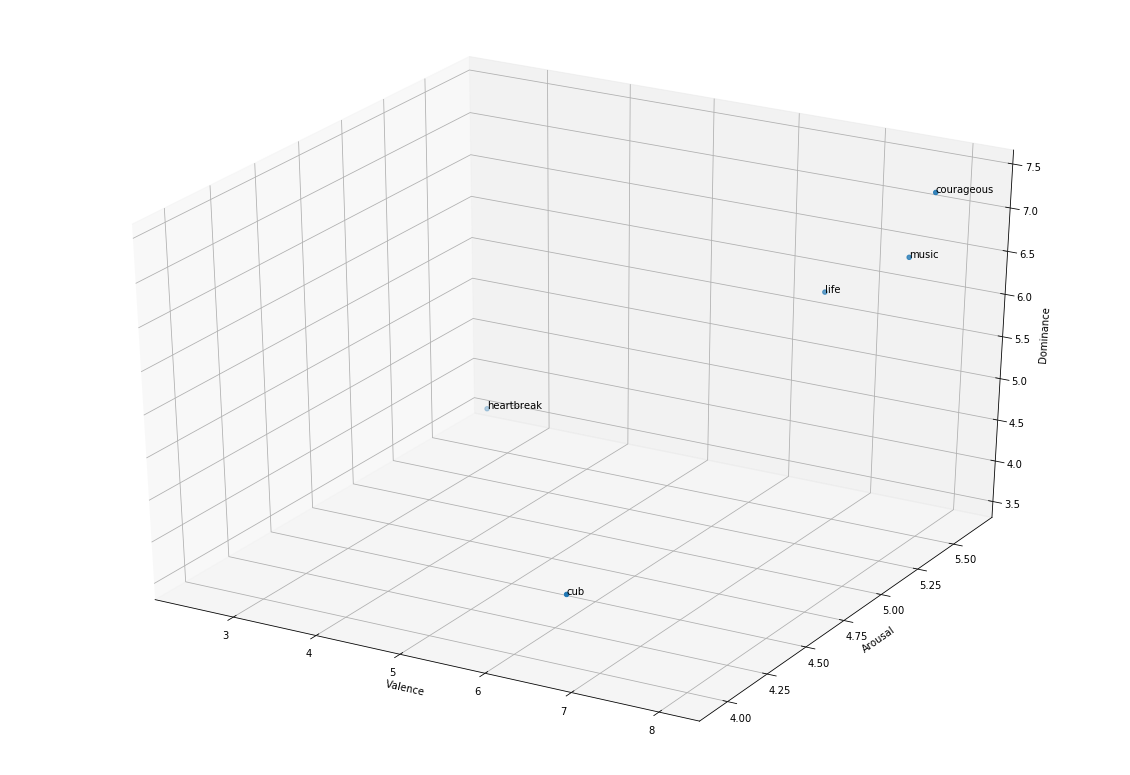

In [5]:
%matplotlib inline
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,14))
ax = fig.gca(projection='3d')
ax.set_xlabel('Valence')
ax.set_ylabel('Arousal')
ax.set_zlabel('Dominance')
ax.scatter3D(matrix_osgood[:,0], matrix_osgood[:,1], matrix_osgood[:,2])
for i,v in enumerate(matrix_osgood):
    ax.text(matrix_osgood[i,0],matrix_osgood[i,1], matrix_osgood[i,2], f"{df_osgood.index[i]}")


Osgood et al. (1957) stellen hierbei die Semantik eines Wortes auf Grundlage von **vorab definierten Merkmalsdimensionen** (*feature engineering*) dar. Neuere computerlinguistische Ansätze "überspringen" diesen Schritt der expliziten Merkmalskodierung, indem relevante semantische Merkmale automatisch aus unannotierten Text-Korpora gelernt werden können. Dies wird als *feature learning / feature extraction* bezeichnet (später mehr dazu). Hierbei wird hauptsächlich der umgebende Kontext eines Wortes berücksichtigt, um auf dieser Basis eine Wortsemantik erlernen zu können. 

In diesem Sinne vereinen diese Algorithmen folgende zwei Intuition:
1. Wörter sind als Punkte/Vektoren in einem mehrdimensionalen Raum darstellbar
2. die Bedeutung eines Wortes erschließt sich durch seinen Kontext (Distributionelle Hypothese)

**Hinweis:** Obwohl ich aktuell von Wörtern spreche, werden wir bei späteren Verfahren sehen, dass diese nicht nur die Semantik einzelner Wörter codieren können, sondern beliebige Sequenzen als Input nehmen können (z.B. Phrasen, Sätze etc.). 

### 2.3. Embeddings

Aus den [2.2.](#2.2.-Vektorsemantik) vorgestellten Zusammenhängen kann nun der Begriff Embedding defininert werden: 

**Definition**
>The idea of vector semantics is thus to represent a word as a point in some multidimensional
>semantic space. Vectors for representing words are generally called
>**embeddings**, because the word is embedded in a particular vector space.<br>
> (Jurafsky & Martin, 2019)

Die einzelnen Algorithmen zur Generierung dieser Embeddings arbeiten im Detail sehr unterschiedlich, gemein ist ihnen allen jedoch, dass sie **immer** den umgebenden Kontext ihres Inputs (Wörter, Sätze, Phrasen, Paragraphen, Dokumente etc.) für die Generierung der gewünschten 'Ziel-Embeddings' nutzen. Hierfür müssen die Modelle zunächst auf einer ausreichenden Menge an Texten trainiert werden. Anschließend können auch neue oder unbekannte Daten durch das Modell in den entsprechenden Vektorraum transformiert/eingebettet werden. Das Resultat dieser Einbettung/Transformation ist eine semantische Repräsentation für einen Input, von dem wir kein zuvor **keine** Information über dessen Semantik hatten. 

**Hinweis:** Der resultierende semantische Raum bzw. die semantische Anordnung der Vektoren in diesem Raum lässt sich jedoch aktuell nur relativ schwierig (systematisch) unter die in [2.1.](#2.1.-lexikalische-Semantik) dargestellten Konzepte fassen. Wir können zwar bestimmte semantische Phänomene in diesem Vektorraum beobachten (später mehr dazu) und durch Embeddings konnte die Performanz von NLP-Systemen für sehr verschiedene Aufgabenstellungen gesteigert werden, allerdings besteht noch ein deutlicher Forschungsbedarf mit Blick auf die Transparenz und Erklärbarkeit dieser Modelle (vgl. Jurafsky & Martin, 2019). 

Vereinfacht gesagt: Embeddings funktionieren, wir wissen nur nicht genau warum ;)

Embeddings zu Sprachdaten können hierbei grundsätzlich auf zwei Arten codiert werden
1. *sparse* ('dünnbesetzt')
2. *dense* ('dichtbesetzt')

Da die Codierung von Sprachdaten als *sparse vector* das - forschungshistorisch betrachtet - ältere Verfahren darstellt, soll zunächst diese Datenrepräsentation erläutert werden.

## 3. Semantik über Sparse Vectors
**Lernziele:**
- Was ist die BOW-Repräsenation? Warum ist sie ein Beispiel für einen *sparse vector* bzw. eine *sparse matrix*?
- Was ist der Unterschied zwischen einer Term-Dokument- und einer Term-Term-Matrix?


### 3.1. Bag-of-Words (BOW) / Term-Dokument-Matrix

Eine der ersten Ansätze zur Repräsentation der Bedeutung von unstrukturierten Textdaten kommt aus dem Bereich des **Information Retrieval (IR)**. Die Semantik eines Textes wird in den sogenannten **Bag-of-Words-Modellen (BOW)** als Menge der Vorkommenshäufigkeit von **ungeordneten** Termen (~ Wörter/Tokens) innerhalb jedes Dokuments erfasst. Über alle Dokumente eines Korpus hinweg kann somit eine Kookkurenz-Matrix aller Terme für alle Dokumente erstellt werden. Diese Matrix bezeichnet man als **Term-Dokument-Matrix oder BOW** . Hierbei gilt:

- Anzahl Spalten = |V| (V=Vokabular)
- Anzahl Zeilen = |D| (D=Menge der Dokumente)

Ein Beispiel für eine Term-Dokument-Matrix findet sich in der nächsten Zelle. 

In [6]:
# Beispiel für Term-Dokument-Matrix
data_shakespeare = {"battle":[1, 0, 7, 13],
                    "good":[114, 80, 62, 89],
                    "fool":[36, 58, 1, 4],
                    "wit":[20, 15, 2, 3]}
df_shakespeare = pd.DataFrame.from_dict(data_shakespeare, orient="index",
                                        columns =["As You Like It", "Twelth Night", "Julius Caesar", "Henry V"])
df_shakespeare

,As You Like It,Twelth Night,Julius Caesar,Henry V
battle,1,0,7,13
good,114,80,62,89
fool,36,58,1,4
wit,20,15,2,3


Das o.g. BOW kann wie folgt aus (tokenisierten) Dokumenten erzeugt werden:

>**Vorgehen**
>1. Bestimme |V|<br>
>   - Anzahl Spalten der Matrix<br><br>
>2. Bestimme |D|<br>
>   - Anzahl Zeilen der Matrix<br><br>
>3. Bestimme die Termfrequenz jedes Terms in jedem Dokument<br><br>
>4. Codiere die Termfrequenz pro Dokument für **alle gleichen Terme** immer in derselben Spalte<br>
>   - *Hinweis: Meist wird chronologisch durch die Dokumente und Terme iteriert, um zu bestimmen, in welcher Dimension welcher Term codiert werden soll. Prinzipiell ist die Dimensionscodierung aber arbiträr.*<br>

**Aufgabe**
4. Erstellen Sie ein BOW für das unten angegebene Korpus *corpus*. Das Korpus liegt tokenisiert vor.


In [7]:
# Erstellung eines simplen Spielzeug-Korpus
from pprint import pprint
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

# Daten von hier:
# https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html#sphx-glr-auto-examples-tutorials-run-word2vec-py
string_doc1 = "John likes to watch movies. Mary likes movies too."
string_doc2 = "John also likes to watch football games. Mary hates football."

doc1_tokenized = tokenizer.tokenize(string_doc1)
doc2_tokenized = tokenizer.tokenize(string_doc2)

corpus = [doc1_tokenized,doc2_tokenized]
pprint(corpus,width=100)

[['John', 'likes', 'to', 'watch', 'movies', 'Mary', 'likes', 'movies', 'too'],
 ['John', 'also', 'likes', 'to', 'watch', 'football', 'games', 'Mary', 'hates', 'football']]


**Lösung (chronologisch)**<br>
d1_bow = [1, 2, 1, 1, 2, 1, 1, 0, 0, 0, 0]<br> 
d2_bow = [1, 1, 1, 1, 0, 1, 0, 1, 2, 1, 1]<br> 

In [8]:
# BOW in Gensim

# Erzeugung eines Dictionary, welches für jeden Term die Codierungsdimension speichert
from gensim.corpora import Dictionary

dictionary = Dictionary(corpus)
print(dictionary)

2019-12-05 11:47:25,600 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2019-12-05 11:47:25,616 : INFO : built Dictionary(11 unique tokens: ['John', 'Mary', 'likes', 'movies', 'to']...) from 2 documents (total 19 corpus positions)


Dictionary(11 unique tokens: ['John', 'Mary', 'likes', 'movies', 'to']...)


In [9]:
# Hinweis: Die Codierung der Elemente erfolgt hierbei 
# **nicht chronologisch**
pprint({v:k for k,v in dictionary.token2id.items()})

{0: 'John',
 1: 'Mary',
 2: 'likes',
 3: 'movies',
 4: 'to',
 5: 'too',
 6: 'watch',
 7: 'also',
 8: 'football',
 9: 'games',
 10: 'hates'}


In [10]:
# Das resultierende BOW-Modell ist zudem Sparse als Liste von Tupeln gespeichert,
# d.h. Dimensionen mit 0 vorkommenden Termen werden ausgelassen (aus Performanzgründen)
# Das erste Element des Tuples korrespondiert mit dem Termindex im Dictionary, wohingegen
# das zweite Elementdie absolute Termfrequenz darstellt
bow_corpus = [dictionary.doc2bow(doc) for doc in corpus]
bow_corpus

[[(0, 1), (1, 1), (2, 2), (3, 2), (4, 1), (5, 1), (6, 1)],
 [(0, 1), (1, 1), (2, 1), (4, 1), (6, 1), (7, 1), (8, 2), (9, 1), (10, 1)]]

In [11]:
# neue Terme können mit dem BOW-Modell nun in den gleichen Vektorraum transformiert werden
# unbekannte Terme werden dabei ausgelassen
vec_known = dictionary.doc2bow("Mary likes John".split())
vec_partially_unknown = dictionary.doc2bow("Mary likes soccer".split())
vec_unknown = dictionary.doc2bow("unknown".split())

print(f"BOW-Vektor (alle Terme in Eingabe bekannt): {vec_known})")
print(f"BOW-Vektor (teilweise unbekannte Terme in Eingabe): {vec_partially_unknown})")
print(f"BOW-Vektor (nur unbekannte Terme in Eingabe: {vec_unknown})")

BOW-Vektor (alle Terme in Eingabe bekannt): [(0, 1), (1, 1), (2, 1)])
BOW-Vektor (teilweise unbekannte Terme in Eingabe): [(1, 1), (2, 1)])
BOW-Vektor (nur unbekannte Terme in Eingabe: [])


In [12]:
# Zur Visualisierung dieser hochdimensionalen Vektoren können diese
# über verschiedene Dimensionalitätsreduktionsverfahren (z.B. PCA / t-SNE)
# auf 2- oder 3-D reduziert werden
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

d1_bow = [1, 2, 1, 1, 2, 1, 1, 0, 0, 0, 0]
d2_bow = [1, 1, 1, 1, 0, 1, 0, 1, 2, 1, 1]

arr1 = np.array(d1_bow).reshape(1,-1)
arr2 = np.array(d2_bow).reshape(1,-1)

X_bow = np.concatenate((arr1,arr2),axis=0)

print(f"Term-Dokument-Matrix (chronologisch):\n{X_bow}")
print()

# Reduzierung der Daten auf 2-D
tsne = TSNE(n_components=2, random_state=42)
X_bow_2d = tsne.fit_transform(X_bow)

print(f"Term-Dokument-Matrix (2-D):\n{X_bow_2d}")

# Plotten der Ergebnisse
soa = np.array([[0, 0, X_bow_2d[0][0], X_bow_2d[0][1]], [0, 0, X_bow_2d[1][0], X_bow_2d[1][1]]])
X, Y, U, V = zip(*soa)
plt.figure()
ax = plt.gca()
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, color = ["r","b"])
for i,p in enumerate(X_bow_2d):
    ax.text(p[0], p[1], f"d{i+1}")

ax.set_xlim([-2000, 2000])
ax.set_ylim([-2000, 2000])
plt.draw()
plt.show()

NameError: name 'np' is not defined

### 3.2. Term-Term-Matrix / Wort-Wort-Matrix

Eine Term-Term-Matrix greift den Grundgedanken hinter den BOW-Modellen zur Semantik-Modellierung auf, indem nicht ein gesamtes Dokument als "Bedeutungskontext" festgelegt wird, sondern in dem Trainingskorpus nur gezählt wird, wie oft welche Wörter in einem bestimmten festgelegten "Fensterkontext" vorkommen. Zur Bestimmung dieser Frequenzen wird jeweils ein relativ kleines Fenster (z.B. +/-2 Wörter) durch das Trainingskorpus "geschoben", um den direkt umgebenden Kontext zu bestimmen. Wir werden diesen Ansatz bei word2vec wiedersehen, indem darüber Trainingsbeispiele für den zugrundeliegenden Klassifikator aus dem Input-Text generiert werden.

![](http://mccormickml.com/assets/word2vec/training_data.png)
*Abb. 2: Illustration des fenster-basierten Ansatzes zur Erzeugung einer Term-Term-Matrix<br>(Quelle: http://mccormickml.com/assets/word2vec/training_data.png)*

Für die Dimensionen der Term-Term-Matrix gilt:

- Anzahl Spalten = |V| (V=Vokabular)
- Anzahl Zeilen = |V| (D=Menge der Dokumente)

## 4. Gewichtung von frequenzbasierten Vektoren
**Lernziele**<br>
- Was ist TF-IDF? Warum sind reine Termfrequenzen unzureichend zur Semantikdifferenzierung?
- Was sind Anwendungsbereiche dieses Gewichtungsmaßes?


## 4.1. TF-IDF
Obgleich die Frequenz eines Wortes in einem Text sicherlich auch z.T. semantisch motiviert sein kann, lassen sich darüber keine Rückschlüsse schließen, ob diese Wort auch bedeutsam für die Bedeutungsdifferenzierung zwischen verschiedenen Texten ist. So sind z.B. Funktionswörter zwar hochfrequent, allerdings nicht nützlich für die Erfassung einer spezifischen Textsemantik, Hapax Legomena hingegen wären es schon. Diese hätten allerdings wieder den Nachteil, dass sie zu spezifisch für einen Einzeltext sind, um über mehrere Texte hinweg eine gemeinsame Semantik erfassen zu können. Jurafsky und Martin (2019) kommentieren dies treffend mit

>It’s a bit of a paradox. Words that occur nearby frequently (maybe pie nearby
cherry) are more important than words that only appear once or twice. Yet words
that are too frequent—ubiquitous, like the or good— are unimportant. How can we
balance these two conflicting constraints?<br>

Zur Gewichtung dieser sehr unterschiedlichen Anforderungen wurde in der IR-Forschung der **TF-IDF-Algorithmus** entwickelt. Ziel des Algorithmus ist eine Gewichtung der reinen Frequenzwerte.

Die zwei Komponenten zur Berechnung dieser TF-IDF-Maße sind

**TF** = Termfrequenz<br>
**IDF** = Inverse Dokumentfrequenz<br>


#### Bestimmung von TF
\begin{align}
t \widehat{=}"Term"\\
d \widehat{=} "Dokument"\\
\end{align}<br>

- Bestimmung der Vorkommenshäufigkeit eines Terms t in Dokument d
\begin{align}
tf_{t,d} = count(t,d)
\end{align}<br>

- Alternativ: Log-Skalierung der reinen Termfrequenz
\begin{align}
tf_{t,d} = log_{10}(count(t,d)+1)
\end{align}<br>

#### Bestimmung von IDF
\begin{align}
df_{t} \widehat{=}"Dokumentfrequenz\ eines\ Terms\ t"\\
N \widehat{=} "Anzahl\ der\ Dokumente"\\
\end{align}<br>

- Bestimmung der inversen Dokumentfrequenz
\begin{align}
idf_{t} = log_{10}\left (\frac{N}{df_{t}}\right )
\end{align}<br>

#### Bestimmung von TF-IDF
\begin{align}
tfidf_{t,d} = tf_{t,d} \cdot idf_{t}
\end{align}<br>

Durch die Multiplikation der beiden Maße ergibt sich eine gleichmäßige Gewichtung der Frequenzinformation pro Dokument sowie über alle Dokumente hinweg.

**Hinweis:**<br>
Neben den hier vorgestellten Gewichtungen existieren eine Reihe von alternativen Formeln zur Bestimmung der einzelnen Formelbestandteile. Formal werden diese häufig in der sog. [SMART-Notation](https://en.wikipedia.org/wiki/SMART_Information_Retrieval_System) angegeben. Diese wird z.B. auch in Gensim sowie in anderen IR-Systemen verwendet.

In [ ]:
# TFIDF-Transformationen
from gensim.models import TfidfModel

tfidf=TfidfModel(bow_corpus)
pprint(list(tfidf[bow_corpus]))

In [ ]:
# Erinnerung: So sah unser Spielzeugkorpus aus
pprint({v:k for k,v in dictionary.token2id.items()})
print()
pprint(corpus, width=100)

### 4.2. Pointwise Mutual Information
Eine alternative Gewichtungsfunktion für Term-Term- oder Term-Dokument-Matrizen stellt die **Pointwise Mutual Information (PMI)** dar. Grundsätzlich wird hierbei ermittelt, wie oft zwei Ereignisse gemeinsam auftreten in Relation zu ihrem Auftreten, wenn sie unabhängig voneinander wären. Durch Verhältnis dieser beiden Wahrscheinlichkeiten zueinander kann dann bestimmt werden, wie oft zwei Wörter mehr oder weniger häufig auftreten als wir es zufällig erwarten würden.

\begin{align}
w \widehat{=}"Zielwort"\\
c \widehat{=} "Kontextwort"\\
PMI(w,c) = log_{2} \frac{P(w,c)}{P(w)P(c)}
\end{align}

Üblicherweise wird jedoch nur die Positive Pointwise Mutual Information (PPMI) verwendet, da negative PMI-Werte zum einen problematisch hinsichtlich ihrer Interpretierbarkeit sind und zum anderen unzuverlässig bei geringeren Korpusgrößen sind. In der Regeln werden alle negativen PMI-Werte deswegen durch 0 ersetzt.

\begin{align}
PPMI(w,c) = max(log_{2} \frac{P(w,c)}{P(w)P(c)},0)
\end{align}


Da die PPMI für infrequente Ereignisse generell höher ist, wird häufig die Wahrscheinlichkeit des Kontextwortes durch die Anwendung einer "Erhöhungsfunktion" gesteigert. Durch ein Setzen von Alpha = 0.75 wird die Warscheinlichkeit für infrequente Ereignisse etwas gesteigert, indem hochfrequente etwas weniger Wahrscheinlichkeitsmasse erhalten.

\begin{align}
P_{\alpha}(c) = \frac{ count(c)^\alpha}{\sum_c count(c)^\alpha}\\
PPMI(w,c) = max(log_{2} \frac{P(w,c)}{P(w)P_{\alpha}(c)},0)\\
\end{align}


Ein Beispiel für PPMI-Scores zwischen verschiedenen Ziel- und Kontextwörtern in einem Wikipedia-Dump, findet sich [hier](https://en.wikipedia.org/wiki/Pointwise_mutual_information).

### 4.3. Anwendungsfelder
TF-IDF-Modelle dienen häufig als **Base-Line zur Bestimmung einer einfachen Semantik** für Dokumente bzw. Sucheingaben (IR-Perspektive) innerhalb eines Vektorraums. Zur Bestimmung der Ähnlichkeit zwischen Vektoren in einem Vektorraum fehlt uns allerdings noch eine sogenannte Ähnlichkeitsmetrik, welche im Folgenden vorgestellt werden soll.

## 5. Ähnlichkeitsbestimmung im Vektorraum
**Lernziele:**
- Was ist die Kosinusähnlichkeit von zwei Vektoren?

###  Kosinusähnlichkeit
Die Kosinusähnlichkeit zweier Vektoren *v* und *w* ist definiert als:

\begin{align}
cosine(v,w) = {\mathbf{v} \cdot \mathbf{w} \over |\mathbf{v}||\mathbf{w}|} = \frac{ \sum\limits_{i=1}^{N}{v_i  w_i} }{ \sqrt{\sum\limits_{i=1}^{N}{v_i^2}}  \sqrt{\sum\limits_{i=1}^{N}{w_i^2}} }
\end{align}

Hierbei werden die beiden Vektoren miteinander hinsichlich des Kosinus ihres eingeschlossenen Winkels verglichen. Das Maß dient also zur Interpretation der Lage von zwei Vektoren zueinander.

\begin{align}
cosine(v,w) = 1 \widehat{=} "Vektoren\ haben\ gleiche\ Ausrichtung" \widehat{=} "Ähnlichkeit"\\
cosine(v,w) = 0 \widehat{=} "Vektoren\ stehen\ orthogonal\ zueinander" \widehat{=} "keine\ Ähnlichkeit"\\
cosine(v,w) = -1 \widehat{=} "Vektoren\ haben\ entgegengesetzte\ Ausrichtung" \widehat{=} "Unähnlichkeit"\\
\end{align}

Graphisch kann dieses Verhältnis folgendermaßen visualisiert werden:

![](img/cosine_sim.png)
*Abb. 3: Visualisierung der Kosinus-Ähnlichkeit zwischen Vektoren<br>Quelle: http://blog.christianperone.com/2013/09/machine-learning-cosine-similarity-for-vector-space-models-part-iii/*

Über die Ähnlichkeit von Vektoren zueinander kann anschließend z.B. bestimmt werden, welche Sucheingabe am ähnlichsten zu welchem Dokument ist.

In [ ]:
# Suche nach dem ähnlichsten Dokument gegeben einen Suchanfrage/Query
# Hinweis: TF-IDF (transformiertes Korpus als Grundlage)
from gensim.similarities import MatrixSimilarity

index = MatrixSimilarity(tfidf[bow_corpus])

query_document1 = 'movies'.split()
query_document2 = 'football'.split()
query_document3 = 'movies football'.split()

query_bow1 = dictionary.doc2bow(query_document1)
query_bow2 = dictionary.doc2bow(query_document2)
query_bow3 = dictionary.doc2bow(query_document3)

sims1 = index[tfidf[query_bow1]]
sims2 = index[tfidf[query_bow2]]
sims3 = index[tfidf[query_bow3]]

print(f"Query: {query_document1}\nKosinus-Ähnlichkeit: {list(enumerate(sims1))}", end="\n\n")
print(f"Query: {query_document2}\nKosinus-Ähnlichkeit: {list(enumerate(sims2))}", end="\n\n")
print(f"Query: {query_document3}\nKosinus-Ähnlichkeit: {list(enumerate(sims3))}", end="\n\n")

## Semantik über Dense Vectors
**Lernziele:**
- Was sind Dense Vectors?
- Welche Algorithmen / Verfahren existieren zur Generierung von Dense Vectors?
- Was sind Contextualized String Embeddings?

### 6.1. word2vec
Neben der in [3.](##3.-Semantik-über-Sparse-Vectors) und [4.](##4.-Gewichtung-von-frequenzbasierten-Vektoren) dargestellten Codierung von Sprachdaten in einem dünnbesetzten Vektorraum existiert eine alternative Codierung in einem dichtbesetzten Vektorraum.

Dies hat u.a. folgende Vorteile:
- bessere Erfassung von Synonymie
- weniger Features für das Training 
- speichereffizienter

Als **eine** Methode für die Erzeugung von deartigen Vektoren zur Repräsentation der Wortsemantik wird das Softwarepaket **word2vec** (Mikolov et al., 2013a/b) vorgestellt, welches folgende Algorithmen umfasst:
- **Skip-Gram**
- Continuous Bag of Words (CBOW)

![](img/cbow_vs_skip_gram.png)
*Abb. 4: Vergleich Skip-Gram vs. CBOW-Architektur<br>Quelle: Mikolov et al., 2013a*


Aus Gründen der Einfachheit wird nicht die Variante des Skip-Gram-Algorithmus mit mehreren Klassen (Softmax Layer) vorgestellt, sondern das **Skip-Gram mit negativem Sampling**, welches das Training dieser Embeddings auf ein binäres Klassifikationsproblem runterbricht.

**Methode**
>1. Treat the target word and a neighboring context word as positive examples.
>2. Randomly sample other words in the lexicon to get negative samples.
>3. Use logistic regression to train a classifier to distinguish those two cases.
>4. Use the regression weights as the embeddings.<br>(Jurafsky & Martin, 2019)


![](img/word2vec_context.JPG)
*Abb. 5: Extraktion von positiven Trainingsbeispielen aus den Trainingsdaten*


![](img/word2vec_samples.JPG)
*Abb. 6: Generierung von negativen Trainingsbeispielen aus den Trainingsdaten*

Zur Bestimmung des geeigneten Störworts (*noise word*) für die negativen Trainingsbeispiele, wird eine gewichtete Unigramm-Frequenz mit dem Faktor Alpha zugrunde gelegt:

\begin{align}
P_{\alpha}(w) = \frac{count(w)^\alpha}{\sum_{w'} count(w)^\alpha}
\end{align}

Die Gewichte werden hierbei für das Training zunächst auf zufällige Werte initialisiert. Durch den Trainingsprozess werden diese Gewichte schrittweise für die einzelnen Trainingsbeispiel so angepasst, dass der Klassifikator immer genauer unterscheiden kann, ob ein Kontextwort neben einem Zielwort auftaucht. Diese Gewichte können nach dem Training als Embedding genutzt werden, um hochdimensionale Wortvektoren in einen niedriger dimensionierten Raum zu projizieren.

![](http://mccormickml.com/assets/word2vec/word2vec_weight_matrix_lookup_table.png)
*Abb. 7: Nutzung der trainierten Gewichte des Klassifikators zur Einbettung von hochdimensionalen Wortvektoren<br>Quelle: http://mccormickml.com/assets/word2vec/word2vec_weight_matrix_lookup_table.png*

Für das Training des Klassifikators müssen folgende zwei Optimierungsziele beachtet werden:

>1. **Maximierung** der Ähnlichkeit für das Zielwort- und Kontextwort-Paare (t,c) gezogen aus der Menge der positiven Trainingsbeispiele
>2. **Minimierung** der Ähnlichkeit von (t,c)-Paaren gezogenen aus der Menge der negativen Trainingsbeispiele 

Formal definiert ergibt sich daher für das Lernziel L(Theta) über die **gesamten Trainingsdaten** hinweg:

\begin{align}
L(\theta) = \sum _{(t,c)\in +}logP(+|t,c) + \sum _{(t,c)\in -}logP(-|t,c) 
\end{align}

Für jedes **einzelne Zielwort-Kontextwort-Paar** (t,c) mit Noise-Wörtern n1..ni ergibt sich somit folgendes Lernziel:
\begin{align}
L(\theta) = logP(+|t,c) + \sum ^k_{i=1}logP(-|t,n_{1})\\
\end{align}

Nach erfolgreichem Training liegen zwei separate Embeddings/Gewichtsmatrizen für jedes Wort *w* vor
1. die Zielembedding *T*
2. das Kontextembedding *C*

![](img/word2vec_weights.JPG)
*Abb. 8: Visualisierung des Ziel- und Kontextembeddings mit ihren jeweiligen Trainingszielen<br>(entnommen aus Jurafsky & Martin, 2019)*

**Hinweis:**
Mit dem vorgestellten word2vec-Verfahren können zwar bekannte Wörter in einem Korpus relativ schnell in eine entsprechende dichte Repräsentation transformiert werden, allerdings können unbekannte Wörter nicht in diesen Vektorraum überführt werden.

In [ ]:
# Laden des vortrainierten word2vec-Google-News-Korpus
# Quelle:
# https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html#sphx-glr-auto-examples-tutorials-run-word2vec-py
import gensim.downloader as api
word2vec = api.load('word2vec-google-news-300')


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Test: kompositionelle Semantik bzw. Analogieschlüsse über Wortvektoren möglich?
queen_estimate = word2vec.get_vector("king") - word2vec.get_vector("man") + word2vec.get_vector("woman")
queen = word2vec.get_vector("queen")

sim_queen_queen_estimate = cosine_similarity(queen.reshape(1, -1), queen_estimate.reshape(1, -1))[0][0]

print(f"Kosinus-Ähnlichkeit zwischen kompositionellem Vektor zu 'queen' und tatsächlichem Wortvektor 'queen':\n{sim_queen_queen_estimate}", end="\n\n")

rome_estimate = word2vec.get_vector("Paris") - word2vec.get_vector("France") + word2vec.get_vector("Italy")
rome = word2vec.get_vector("Rome")

sim_rome_rome_estimate = cosine_similarity(rome.reshape(1, -1), rome_estimate.reshape(1, -1))[0][0]

print(f"Kosinus-Ähnlichkeit zwischen kompositionellem Vektor zu 'Rome' und tatsächlichem Wortvektor 'Rome':\n{sim_rome_rome_estimate}")



In [ ]:
# Wie ähnlich sind sich zwei Wörter?
w1 = "queen"
w2 = "king"

sim_w1_w2 = cosine_similarity(word2vec.get_vector(w1).reshape(1, -1).reshape(1, -1), word2vec.get_vector(w2).reshape(1, -1))[0][0]
print(f"Kosinus-Ähnlichkeit zwischen '{w1}' und '{w2}':\n{sim_w1_w2}")
 

**Hinweis:**<br>
Die gesamten word2vec-Embeddings von Google News können **interaktiv** auf folgenden Seiten durchsucht werden:
- https://projector.tensorflow.org/
   - 2/3-D Darstellung der Daten möglich, Suche nach den n ähnlichsten Wörtern
- https://rare-technologies.com/word2vec-tutorial/#app
   - Web-Demo für Ähnlichkeitssuchen (mit "Analogieschlüssen", Filtern von untypischen Wörtern aus einer Reihe etc.)

### 6.2. weitere Verfahren

Folgendes [Github-Repo](https://github.com/Hironsan/awesome-embedding-models) listet eine Reihe von Algorithmen zur Generierung von Embeddings aus unannotierten Textdaten.

Aktuell (Stand: 12/2019) geläufige Verfahren sind hierbei u.a.: 
- FastText
- Glove
- ELMo
- BERT

Im Detail kann auf die einzelnen Embedding-Verfahren nicht eingegangen werden. Neue Verfahren gehen allerdings deutlich über rein wort-basierte semantische Repräsentationen hinaus, indem z.B. versucht wird, über neuronale Lernverfahren eine semantische Repräsentation von Sequenzen innerhalb eines Kontexts (bspw. Satz) zu erlernen. Hierbei wird die Information deutlich komplexer modelliert als z.B. bei word2vec. Zudem werden verschiedene Embeddings häufig miteinander kombiniert (*stacking*), um verschiedene Bedeutungsaspekte besser modellieren zu können.

Um einen ersten Eindruck für diese Arten von Embeddings zu vermitteln, stelle ich euch ein neues Paper (Akbik et al., 2018) zu "Contextualized String Embeddings" vor, welches für eine Reihe von NLP-Downstream-Tasks, bspw. **NER** bis vor knapp 1 Jahr State-of-The-Art-Resulate auf einer Reihe von öffentlich zugänglichen Evaluationskorpora erzielen konnte ([vgl. Link](https://paperswithcode.com/task/named-entity-recognition-ner))


### 6.3. Contextualized String Embeddings
Eine (Python-)Implementation dieser Embeddings, inklusive vortrainierter Sprachmodelle für diverse Sprachen, findet sich unter folgendem [Github-Repo](https://github.com/zalandoresearch/flair). Die von Akbik et al. (2018) vorgeschlagenen Embeddings vereinen hierbei verschiedene Ansätze, welche für die Erfassung der Wortsemantik erforscht wurden: 
- 'klassische' Word Embeddings
- Features auf Character-Ebene
- Kontextualisierung von Word Embeddings

Grundsätzlich werden zunächst die Features auf Character-Ebene durch ein bilaterales Long-Short-Term-Memory-Netzwerk (BiLSTM) codiert. Grob gesagt ermöglichen diese Art von Netzwerk die Speicherung von Information über eine beliebige Sequenzlänge hinweg über sogenannten **Hidden States**, ohne dass z.B. Information, die zu Beginn einer Sequenz erlernt wurde, später vergessen wird, ein Problem, dass bei 'klassischen' Rekurrenten Neuronalen Netzen auftritt. Der Informationsfluss wird dahingehend kontrolliert, dass über bestimmte **Gates** kontrolliert wird, welche Information in den Hidden Sates gespeichert wird oder nicht.
![](https://miro.medium.com/max/1516/1*yBXV9o5q7L_CvY7quJt3WQ.png)
*Abb. 9: Schematische Darstellung der Funktionsweise einer LSTM- und GRU-Zelle*
- *Quelle:*
  - https://miro.medium.com/max/1516/1*yBXV9o5q7L_CvY7quJt3WQ.png


Das trainierte Character-Sprachmodell wird hierbei auf **Satzebene** antrainiert, um mit diesem Modell für jedes Wort in einer Sequenz ein kontextualisiertes Embedding extrahieren zu können.
![](img/context_string_embeddings_char.JPG)
*Abb. 10: Extraktion eines Contextualized String Embeddings für das Wort "Washington" auf Basis de<br>(Quelle: Akbik et al., 2018)*

Diese Embeddings können anschließend als Basis für einen Down-Stream-NLP-Taks dienen, in diesem Falle **NER** (letzter Layer hier: BiLSTM mit Conditonal Random Field (CRF)).

![](img/context_string_embeddings_overview.JPG)
*Abb. 11: Übersicht der Netzwerkarchitektur für Contextualized String Embeddings für den Down-Stream-Task NER<br>(Quelle: Akbik et al., 2018)*

Die Autoren evaluieren ihre vorgeschlagene Netztwerkarchitektur im Detail sowohl quantitativ...

![](img/context_string_embeddings_eval_quant.JPG)
*Abb. 12: Evaluationsergebnisse für Contextualized String Embedddings in verschiedenen Netzwerkkonfigurationen für Sequenzlabeling (letzter Layer: BiLSTM-CRF)<br>(Quelle: Akbik et al., 2018)*

...als auch qualitativ

![](img/context_string_embeddings_eval_qual.JPG)
*Abb. 13: qualitative Evaluation der Semantik des Worts "Washington" in verschiedenen Satzkontexten<br>(Quelle: Akbik et al., 2018)*



**Ergebnisse**<br>
*Hinweis:* Die aktuell besten Trainingskonfigurationen zur Reproduzierbarkeit der Ergebnisse aus dem Paper sind [hier](https://github.com/zalandoresearch/flair/blob/master/resources/docs/EXPERIMENTS.md) dokumentiert.
- **quantitativ**
  - für alle getesteten Trainingskonfigurationen haben Contextualized String Embeddings einen positiven Einfluss auf die Perfomanz bei Down-Stream-NLP-Tasks
  - neue State-of-the-Art-Resultate bei NER
  - gute Performanz bei syntaktischen Aufgaben (POS-Tagging)
  - Stacking von 'klassischen' Word Embeddings und Contextualized String Embeddings nützlich für Sequence Labeling
  - Task-spezifische Character Features sind nicht nötig<br><br>
- **qualitativ**
  - Modell ist in der Lage, polyseme Ausdrücke, wie z.B. "Washington", korrekt über den umliegen Kontext zu disambiguieren
  
  
**Diskussion**
- Contextualized String Embeddings sind ein sinnvolles Instrument zum Erlernen von semantischen Repräsentationen auf unannotierten Daten 
- Trainingszeit deutlich geringer als bei wort-basierten Modellen, da #Character < #Wörter
- Character-basierte Sprachmodelle sind unabhängig von einer Tokenisierung oder einem fixen Vokabular

In [ ]:
from flair.models import SequenceTagger
from flair.data import Sentence

# Mini-Demo: NER-Annotation mit vortrainiertem Flair-Modell
# Quellen:
# https://github.com/zalandoresearch/flair/blob/master/resources/docs/TUTORIAL_2_TAGGING.md
# https://github.com/zalandoresearch/flair/blob/master/resources/docs/TUTORIAL_3_WORD_EMBEDDING.md
tagger = SequenceTagger.load('ner')

sentence = Sentence('George Washington went to Washington .')

tagger.predict(sentence)

print(f"Annotierter Satz: {sentence.to_tagged_string()}")

In [ ]:
# Stacked Embeddings für diese Netz
stacked_embeddings = tagger.embeddings
stacked_embeddings

In [ ]:
sentence = Sentence('The grass is green .')

# Embedding eines Satzes
stacked_embeddings.embed(sentence)

for token in sentence:
    print(token)
    print(token.embedding)
    print(token.embedding.shape)
    print()

## 7. Diskussion
**Themen**
- Evaluation von Word Embeddings?
- Bias bei Word Embeddings?